In [66]:
# Load packages of data preparation 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load packages of machine learning
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Import data preprocessing library
from sklearn.preprocessing import StandardScaler

In [67]:
# Import csv file
df = pd.read_csv("../inputs/Mall_Customers.csv", index_col='CustomerID')
# See first 5 row data
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


<b>Feature</b>
- CustomerID :
- Gender :
- Age :
- Annual Income (k$) :
- Spending Score (1-100) :

In [68]:
# Get features information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


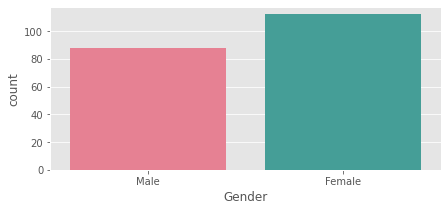

In [69]:
plt.figure(figsize=(7,3))
sns.countplot(x='Gender', data=df, palette='husl')
plt.show()

<Figure size 1080x1080 with 0 Axes>

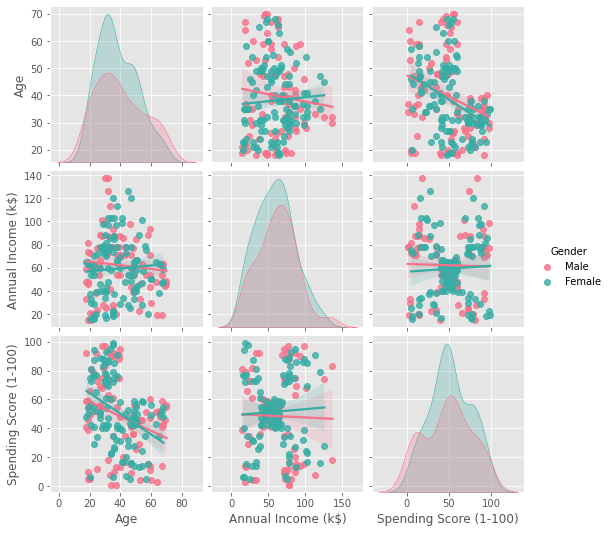

In [70]:
plt.figure(figsize=(15,15))
sns.pairplot(data=df, hue="Gender", palette='husl', kind='reg',
            vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"])
plt.show()

## Preprocessing

In [71]:
# Encoding the Gender column
mapping = {'Male': 1,
           'Female': 0}
df['Gender'] = df['Gender'].map(mapping)

In [78]:
# Scaling columns
col = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
scaler.fit(df[col])
df_scaled = df.copy()
df_scaled[col] = scaler.transform(df[col])

In [79]:
# PCA
pca = PCA(n_components=2)
pca.fit(df)
df_pca = pd.DataFrame(data = pca.transform(df), columns=['PC1', 'PC2'])

In [80]:
# Clustering
inertia = []
k_range = [k for k in range(1,9)]
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

c:\Users\NEGATIVE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


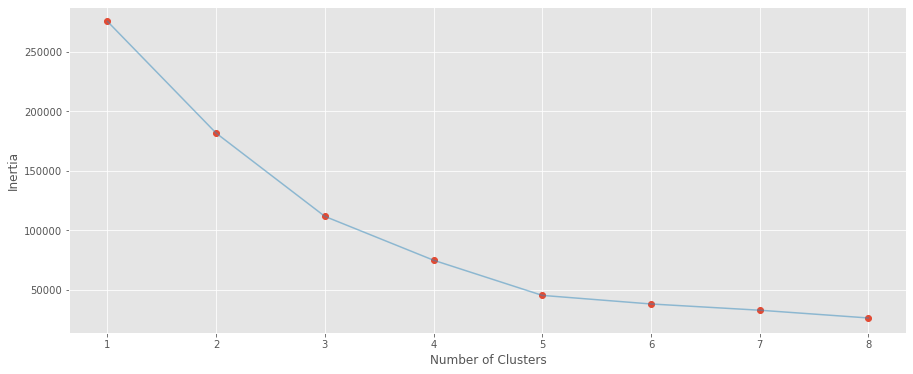

In [81]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(k_range , inertia , 'o')
plt.plot(k_range , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

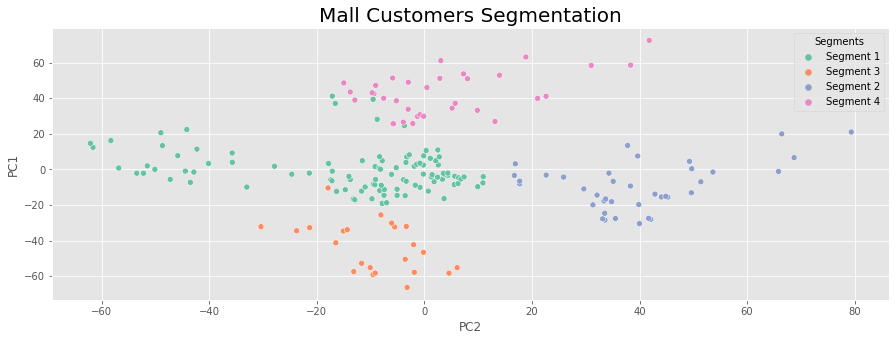

In [82]:
# KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pca)

# Clusters
clusters = kmeans.labels_
cluster_tagged_data = df_scaled.copy()
cluster_tagged_data['Segments'] = clusters
cluster_tagged_data['Segments'] = cluster_tagged_data['Segments'].replace([0, 1, 2, 3], 
                                                    ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4'])

#Converting embedded data into dataframe for better visualization purpose
std_df = pd.DataFrame(df_pca, index = df_pca.index, columns = ['PC1', 'PC2'])
std_df['Segments'] = cluster_tagged_data['Segments']

#Visualizing clusters 
plt.figure(figsize=(15,5))
plt.title('Mall Customers Segmentation', size = 20)
sns.scatterplot(x = 'PC2', y = 'PC1', data = std_df, hue = 'Segments', palette='Set2')
plt.show()



In [83]:
#Number of customers in each segment
segment_count = cluster_tagged_data['Segments'].value_counts()
print(segment_count)

Segment 1    104
Segment 2     39
Segment 4     34
Segment 3     23
Name: Segments, dtype: int64


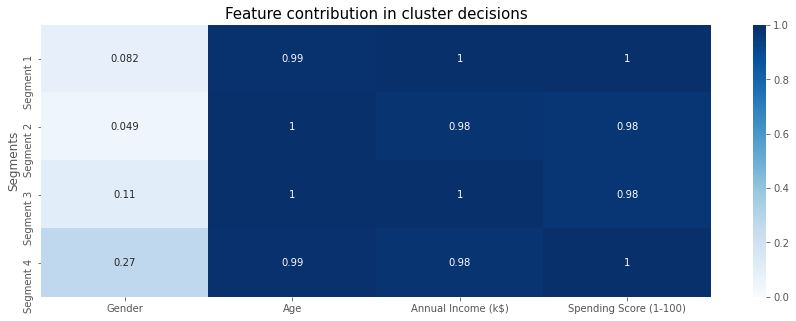

In [84]:
# Contributions of different features in segmentation
cluster_mean = cluster_tagged_data.groupby(['Segments']).mean()
grouped_numeric_data_mean = df.mean()
contributions_group_features = abs(cluster_mean/grouped_numeric_data_mean - 1)

#Visualising contributions in cluster decisions
plt.figure(figsize = (15, 5))
plt.title('Feature contribution in cluster decisions', size = 15)
sns.heatmap(data = contributions_group_features, annot = True, vmin = 0, vmax = 1, cmap = 'Blues')
plt.show()